In [1]:
import random
from pathlib import Path

import networkx as nx
#Community Detection in NetworkX
import networkx.algorithms.community as nxcom
from matplotlib import pyplot as plt
from numpy import random as nprand

Text(0.5, 1.0, 'the Online social network')

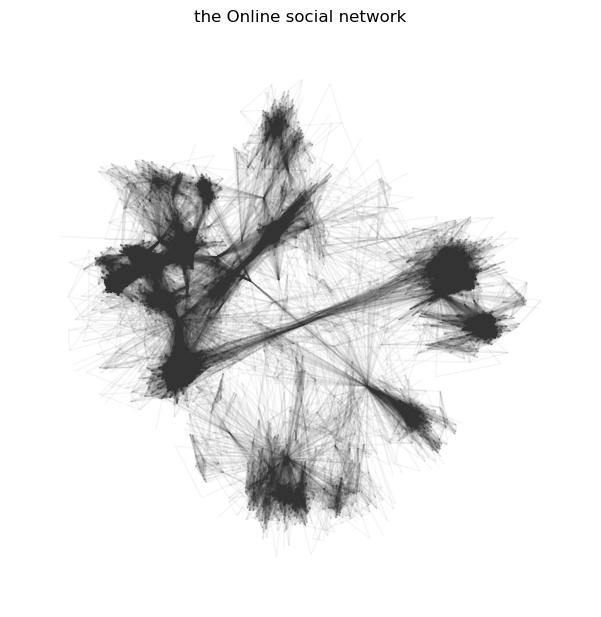

In [7]:
#%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (7.5, 7.5),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})
# Seed random number generator

seed = hash("Network Science in Python") % 2 ** 32
nprand.seed(seed)
random.seed(seed)

# Generate the network
G_karate = nx.karate_club_graph()
# Find the communities
communities = sorted(nxcom.greedy_modularity_communities(G_karate), key=len, reverse=True)
# Count the communities
len(communities)


def set_node_community(G, communities):
    """Add community to node attributes"""
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1


def set_edge_community(G):
    """Find internal edges and add their community to their attributes"""
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0


def get_color(i, r_off=1, g_off=1, b_off=1):
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return r, g, b


# --------------------------------- 绘制在线社交网络 ---------------

# Load data file into network

data_dir = Path('.') / 'data'
G_social = nx.read_edgelist(data_dir / 'facebook_combined.txt', 'r', encoding='utf-8')

# Calculate layout and draw
pos = nx.spring_layout(G_social, k=0.1)
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)
plt.title('the Online social network')

Text(0.5, 1.0, 'the Online social network with communitites')

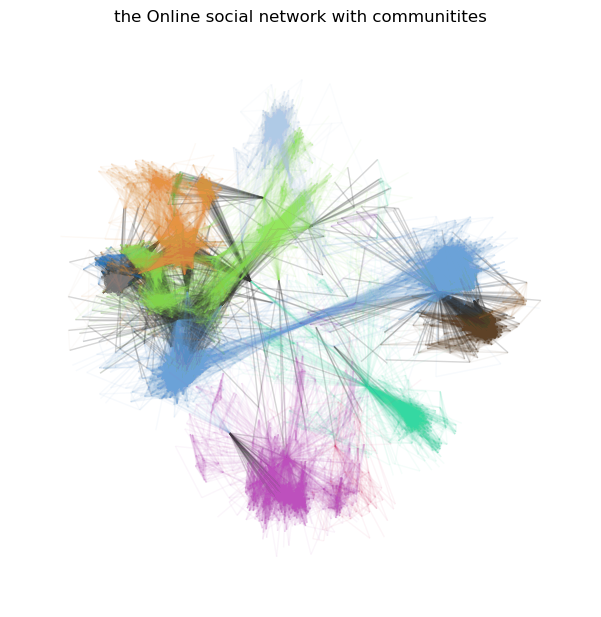

In [8]:
# --------------------------------------- 与社区建立在线社交网络 ---------------

communities = sorted(nxcom.greedy_modularity_communities(G_social), key=len, reverse=True)
len(communities)

# Set node and edge communities
set_node_community(G_social, communities)
set_edge_community(G_social)

# Set community color for internal edges
external = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G_social.edges if G_social.edges[v, w]['community'] > 0]
internal_color = [get_color(G_social.edges[e]['community']) for e in internal]

# Draw external edges
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edgelist=external, edge_color="#333333",
    alpha=0.2, with_labels=False)
# Draw internal edges
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edgelist=internal, edge_color=internal_color,
    alpha=0.05, with_labels=False)
plt.title('the Online social network with communitites')
#plt.savefig()

Text(0.5, 1.0, 'line social networks with K-Cores')

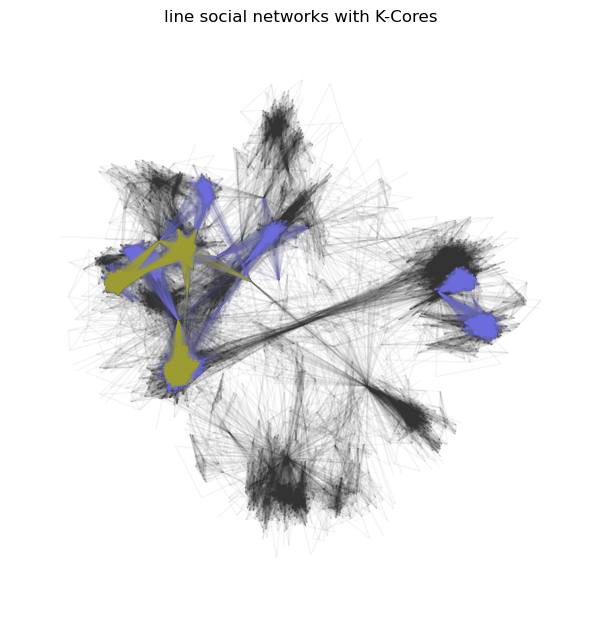

In [9]:
#------------------------------ 与K-Cores的在线社交网络 ---------------
# A k-core is created by removing all nodes of degree less than k from a network.
# The number k can be anything you choose. The larger k is, the more nodes will be stripped away.

# Find k-cores
G_core_30 = nx.k_core(G_social, 30)
G_core_60 = nx.k_core(G_social, 60)

# Visualize network and k-cores
nx.draw_networkx(
    G_social, pos=pos, node_size=0, edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_30, pos=pos, node_size=0, edge_color="#7F7FEF", alpha=0.05, with_labels=False)
nx.draw_networkx(
    G_core_60, pos=pos, node_size=0, edge_color="#AFAF33", alpha=0.05, with_labels=False)
plt.title('line social networks with K-Cores')